In [92]:
import pandas as pd
import numpy as np
import re
import collections
from fastai.text import *
from sklearn.utils.multiclass import unique_labels

In [348]:
df = pd.read_csv('tweets_filtered.csv')

/home/ilsabaqai/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,2,3,5,11,16,18,19,20,22,23,24,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [236]:
df1 = pd.read_csv('train.csv')

In [265]:
drop1 = df1[df1['sentiment']== 'neutral '].index

In [268]:
df1.drop(drop1,inplace = True)

44

In [294]:
df1['text'].to_csv('text_only.csv',index= None)

/home/ilsabaqai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [143]:
df = df.dropna()

In [272]:


data = TextClasDataBunch.from_csv('.','train.csv')
data.show_batch()


text,target
"xxbos “ xxmaj so we ca n’t fight the # coronavirus because we ca n’t see it ? ” \n xxmaj sara xxunk . \n “ xxmaj we can fight it , ” said xxmaj sara ’s xxunk . “ xxmaj the virus xxunk many xxunk of people , and everyone can help us fight it . xxmaj children are special and they can help too ” \n",positive
"xxbos 16 - 24 xxmaj feb 2020 : xxmaj the xxup xxunk # xxmaj china xxmaj joint mission , including experts from 🇨 xxunk 🇨 🇳 🇩 🇪 xxunk xxunk xxunk 🇷 🇳 🇬 🇷 🇺 🇸 🇬 🇺 🇸 spend time in xxmaj beijing & & also xxunk to xxmaj wuhan & & two other xxunk . xxmaj they xxunk with health officials , scientists & & # healthworkers",neutral
"xxbos xxmaj during # xxup covid19 , # beactive & & remain # xxunk : \n ✅ xxmaj take some online xxunk xxunk \n ✅ xxmaj dance \n ✅ xxmaj play active xxunk games \n ✅ xxmaj xxunk / xxunk xxunk \n ✅ xxmaj xxunk xxunk xxunk & & xxunk training \n \n 👉 https : / / t.co / xxunk \n \n",neutral
"xxbos xxmaj the # xxup covid19 pandemic underscores the urgent need to xxunk the global health workforce , of which more than 50 % are nurses 👩 ‍ ⚕ ️ 👨 ‍ ⚕ xxunk \n \n xxmaj on this # worldhealthday , xxup who & & @icnurses xxunk are launching the xxunk ever xxmaj state of the xxmaj world ’s xxmaj nursing xxmaj report : https : / /",neutral
"xxbos "" xxmaj we play games , xxunk , spend time in our xxunk and have xxunk together . xxmaj my xxunk and i xxunk our xxunk and dance . xxmaj we read xxunk and i can keep xxunk because sometimes i xxunk xxunk . xxmaj staying home xxunk xxunk at first , but now it xxunk normal . ” https : / / t.co / l23wn2lzwb \n \n",positive


In [131]:
data.vocab.itos[:1000]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '#',
 'the',
 '/',
 ',',
 '&',
 ':',
 'to',
 'of',
 'covid19',
 '.',
 '\n \n ',
 'and',
 'in',
 'https',
 't.co',
 '"',
 'for',
 'who',
 'coronavirus',
 'we',
 'a',
 'on',
 'is',
 'are',
 'rt',
 'with',
 '…',
 '\n ',
 'health',
 'be',
 'countries',
 'all',
 'that',
 '@drtedros',
 '-',
 'at',
 '2020',
 'as',
 'this',
 'world',
 'have',
 'more',
 'from',
 'you',
 'by',
 'i',
 'can',
 'people',
 'nurses',
 'today',
 'support',
 'their',
 'will',
 'has',
 'not',
 'our',
 'response',
 'it',
 '’s',
 'worldhealthday',
 'healthworkers',
 'an',
 'must',
 'but',
 'they',
 'than',
 'your',
 'other',
 'or',
 'working',
 'been',
 'medical',
 'masks',
 'need',
 'days',
 '@turkiccouncil',
 'outbreak',
 'thank',
 'us',
 'how',
 'first',
 'new',
 'international',
 'mar',
 'cases',
 'time',
 'there',
 '!',
 'now',
 'global',
 'protect',
 'also',
 'my',
 'midwives',
 '’re',
 '“',
 'day',
 '️',
 'which',
 'many',
 '

In [273]:
print(data.train_ds[0][0])
print(data.train_ds[1][0])
print(data.train_ds[2][0])

xxbos xxunk xxmaj jan 2020 : a xxunk xxup who xxunk xxunk by @drtedros xxunk to xxmaj beijing to meet # xxmaj china ’s leadership , learn more about xxmaj china ’s response , and to xxunk any technical xxunk . 
 
  https : / / t.co / xxunk
xxbos xxup rt xxup @whowpro : xxmaj you can help protect yourself and others from # xxup covid19 by being : 
  - xxmaj xxunk 
  - xxmaj prepared 
  - xxmaj smart 
  - xxmaj safe 
  xxmaj get more xxunk …
xxbos xxup rt @whosrilanka : xxmaj protecting yourself and your xxunk xxunk from xxmaj coronavirus is xxunk 👇 https : / / t.co / xxunk


In [ ]:
#language model 
@assigning weight

In [133]:
bs = 24
seed = 333

In [295]:
data_lm = (TextList.from_csv('.', 'text_only.csv')
            .random_split_by_pct(0.1, seed = seed)
           #We randomly split and keep 10% for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('data_lm.pkl')



/home/ilsabaqai/anaconda3/lib/python3.7/site-packages/fastai/data_block.py:215: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


In [296]:
# data_lm = load_data(path, 'data_lm.pkl', bs=bs)
data_lm.show_batch()

idx,text
0,2020 : xxup who xxmaj health xxmaj xxunk for # coronavirus launches on xxunk . # xxup covid19 \n \n https : / / t.co / xxunk xxbos 18 xxmaj mar 2020 : xxup who and partners xxunk xxup solidarity trial to xxunk xxunk xxunk from around the world to find the most effective xxunk for # xxup covid19 . \n \n https : / / t.co /
1,\n \n xxunk cases \n \n xxunk of cases \n \n xxunk transmission \n \n # coronavirus \n \n https : / / t.co / xxunk xxbos 6 xxmaj mar 2020 : xxup who publishes xxunk xxup r&&d xxunk xxunk for # xxup covid19 : https : / / t.co / xxunk # coronavirus \n \n https : / / t.co / xxunk xxbos
2,"xxmaj forum on # xxup covid19 , xxunk by xxunk + experts & & xxunk from around the world . # coronavirus \n \n https : / / t.co / xxunk xxbos 5 xxmaj feb 2020 : xxmaj global community xxunk for xxup xxunk xxunk million to help protect vulnerable countries from # xxup covid19 outbreak . # coronavirus \n \n https : / / t.co / xxunk"
3,"human transmission of the # coronavirus ( in the xxunk xxunk cases ) , xxunk through xxunk xxunk & & that there was a risk of a xxunk xxunk outbreak . \n \n https : / / t.co / xxunk xxbos 13 xxmaj jan 2020 : xxmaj xxunk xxunk case of # xxup covid19 in # xxmaj xxunk , the first xxunk case outside 🇨 🇳 . # coronavirus"
4,"more than 30 others in the xxunk . \n xxmaj it is being released as both an online xxunk and xxunk book . \n \n # coronavirus \n \n https : / / t.co / v6gyrpscvr xxbos “ xxmaj xxunk when we are xxunk very xxunk or xxunk , it can help to xxunk a safe place in our xxunk . "" . xxmaj ario xxunk the"


In [297]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [298]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


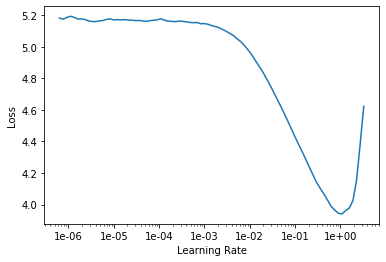

In [299]:
learn.recorder.plot()

In [300]:


learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))



epoch,train_loss,valid_loss,accuracy,time
0,4.837115,4.263633,0.218452,00:13


In [301]:
learn.save('fit_head')
#learn.load('fit_head')

In [302]:
learn.unfreeze()


In [303]:


learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))



epoch,train_loss,valid_loss,accuracy,time
0,4.242873,3.904504,0.256548,00:14
1,3.966454,3.281659,0.330952,00:14
2,3.642622,2.989171,0.381548,00:14
3,3.359432,2.837638,0.392262,00:14
4,3.124468,2.761953,0.406548,00:14
5,2.924288,2.790737,0.391667,00:14
6,2.751606,2.767688,0.399405,00:14
7,2.598912,2.743436,0.410119,00:14
8,2.467861,2.787888,0.398214,00:14
9,2.362701,2.754527,0.403571,00:14


In [304]:
learn.save('fine_tuned')

In [305]:
learn.save_encoder('fine_tuned_encoder')


In [306]:
#classifier

In [307]:
data_clas = (TextList.from_csv('.', 'train.csv', cols = 'text')               
             .random_split_by_pct(0.1, seed = seed)
             .label_from_df(cols=0)
             .databunch(bs=bs))
data_clas.save('data_clas.pkl')
data_clas.show_batch()

/home/ilsabaqai/anaconda3/lib/python3.7/site-packages/fastai/data_block.py:215: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


text,target
"xxbos “ xxmaj so we xxunk n’t fight the # coronavirus because we xxunk n’t see it ? ” \n xxmaj xxunk xxunk . \n “ xxmaj we can fight it , ” said xxmaj xxunk ’s xxunk . “ xxmaj the virus xxunk many xxunk of people , and everyone can help us fight it . xxmaj children are special and they can help too ” \n",positive
"xxbos 16 - 24 xxmaj feb 2020 : xxmaj the xxup xxunk # xxmaj china xxmaj xxunk mission , including experts from 🇨 xxunk 🇨 🇳 xxunk xxunk xxunk xxunk xxunk 🇷 🇳 🇬 🇷 🇺 🇸 🇬 🇺 🇸 xxunk time in xxmaj xxunk & & also xxunk to xxmaj wuhan & & xxunk other xxunk . xxmaj they xxunk with health xxunk , scientists & & # healthworkers",neutral
xxbos xxmaj did xxmaj you xxmaj know xxunk \n ☑ xxunk in 8 # nurses xxunk in a xxunk other than where they were xxunk or xxunk \n ☑ xxunk xxunk % of the world ’s nurses work in countries that are home to 50 % of the world ’s population \n ☑ 90 % of all nurses are xxunk \n \n xxmaj more xxunk :,neutral
"xxbos xxmaj during # xxup covid19 , # xxunk & & xxunk # xxunk : \n ✅ xxmaj take some online xxunk xxunk \n ✅ xxmaj xxunk \n ✅ xxmaj play xxunk xxunk xxunk \n ✅ xxmaj xxunk / xxunk xxunk \n ✅ xxmaj xxunk xxunk xxunk & & xxunk training \n \n 👉 https : / / t.co / xxunk \n \n",neutral
"xxbos xxmaj the # xxup covid19 pandemic underscores the xxunk need to xxunk the global health xxunk , of which more than 50 % are nurses 👩 ‍ ⚕ ️ xxunk ‍ ⚕ xxunk \n \n xxmaj on this # worldhealthday , xxup who & & xxunk xxunk are xxunk the xxunk ever xxmaj state of the xxmaj world ’s xxmaj nursing xxmaj report : https : / /",neutral


In [308]:


learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_encoder')



RNNLearner(data=TextClasDataBunch;

Train: LabelList (216 items)
x: TextList
xxbos 25 xxmaj mar 2020 : # xxup covid19 xxmaj mission to # xxmaj xxunk xxunk 
 
  xxmaj with support from xxup who and other partners , xxmaj xxunk now has the xxunk to xxunk up to xxunk tests . 
 
  https : / / t.co / xxunk,xxbos 25 xxmaj mar 2020 : xxup @un launches # xxup covid19 xxmaj global xxmaj humanitarian xxmaj response xxmaj plan to xxmaj invest xxmaj in xxmaj xxunk 
 
  https : / / t.co / xxunk,xxbos 20 xxmaj mar 2020 : xxup who xxmaj health xxmaj xxunk for # coronavirus launches on xxunk . # xxup covid19 
 
  https : / / t.co / xxunk,xxbos 18 xxmaj mar 2020 : xxup who and partners xxunk xxup solidarity trial to xxunk xxunk xxunk from around the world to find the most effective xxunk for # xxup covid19 . 
 
  https : / / t.co / xxunk # coronavirus,xxbos xxunk xxmaj mar 2020 : xxmaj new guidance published on people affected by humanitarian crises during # xxup covid19 . # coronavirus 
 
  https : / 

In [309]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


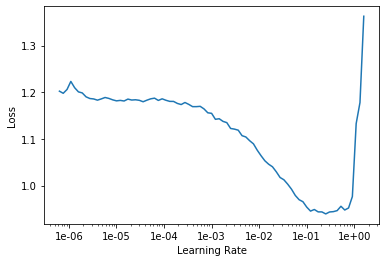

In [310]:
learn.recorder.plot()

In [311]:


learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))



epoch,train_loss,valid_loss,accuracy,time
0,1.106534,1.053389,0.434783,00:14


In [184]:
learn.save('first')

In [312]:


learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-1/(2.6**4),5e-1), moms=(0.8,0.7))



epoch,train_loss,valid_loss,accuracy,time
0,3.608442,1.522553,0.565217,00:15


In [190]:
learn.save('third')

In [316]:
learn.unfreeze()
learn.fit_one_cycle(3, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.554832,0.921104,0.565217,00:19
1,0.556881,0.917715,0.608696,00:20
2,0.510768,0.903517,0.565217,00:20


In [317]:
learn.save('final_class')

In [337]:
df = pd.read_csv('text_only_data.csv',header = None)

In [338]:
df.columns = ['text']

In [339]:
df = df[3000:5000]

In [340]:
df['pred_sentiment'] = df['text'].apply(lambda row: str(learn.predict(row)[0]))

In [343]:
d_test = df[df['pred_sentiment']== 'negative']

In [344]:
for i in d_test['text']:
    print(i)

RT @WHOAFRO: Celebrating the return to the community of four children cured of #Ebola in Kanyihunga, #DRC. They are the last patients to le…
@DrTedros "Our message to the international community is: 

invest today, or pay more later"-@DrTedros #2019nCoV
@DrTedros "We’re sending 250,000 tests to more than 70 reference laboratories globally to facilitate faster testing"-@DrTedros #2019nCoV
RT @WHOAFRO: The most prevalent cancers in the Africa are cervical, breast, liver &amp; prostate – causing over one third of all cancer deaths…
RT @DrTedros: Today’s @WHO Situation Report on the #2019nCoV highlights EPI-WIN's communication with business sector on their role in the o…
RT @DrTedros: When a new virus emerges, like the #2019nCoV, there are always many uncertainties about how it spreads, the disease it causes…
RT @DrTedros: This #WorldCancerDay, @WHO is issuing a wake up call: at least 7 million #cancer deaths could be prevented over the next deca…
RT @WHOEMRO: Today was the maiden voyage o

In [347]:
df.to_csv('model_results.csv',index = None)